<h1>Обучение на изображениях<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Класс-Dataset" data-toc-modified-id="Класс-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Класс Dataset</a></span></li><li><span><a href="#Преобразования-объектов-Dataset" data-toc-modified-id="Преобразования-объектов-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Преобразования объектов Dataset</a></span></li><li><span><a href="#Различие-птиц-и-самолетов" data-toc-modified-id="Различие-птиц-и-самолетов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Различие птиц и самолетов</a></span><ul class="toc-item"><li><span><a href="#Формирование-набора-данных" data-toc-modified-id="Формирование-набора-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Формирование набора данных</a></span></li><li><span><a href="#Полносвязная-модель" data-toc-modified-id="Полносвязная-модель-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Полносвязная модель</a></span></li></ul></li><li><span><a href="#Представление-выходного-сигнала-в-качестве-вероятностей" data-toc-modified-id="Представление-выходного-сигнала-в-качестве-вероятностей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Представление выходного сигнала в качестве вероятностей</a></span></li><li><span><a href="#Функция-потерь-для-классификации" data-toc-modified-id="Функция-потерь-для-классификации-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Функция потерь для классификации</a></span></li><li><span><a href="#Обучение-классификатора" data-toc-modified-id="Обучение-классификатора-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Обучение классификатора</a></span></li><li><span><a href="#Упражнения" data-toc-modified-id="Упражнения-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Упражнения</a></span></li><li><span><a href="#Сверточные-сети" data-toc-modified-id="Сверточные-сети-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Сверточные сети</a></span></li><li><span><a href="#Обнаружение-признаков-с-помощью-сверток" data-toc-modified-id="Обнаружение-признаков-с-помощью-сверток-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Обнаружение признаков с помощью сверток</a></span></li><li><span><a href="#Понижающая-дискретизация" data-toc-modified-id="Понижающая-дискретизация-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Понижающая дискретизация</a></span></li><li><span><a href="#Создание-подклассов-NN.moDule" data-toc-modified-id="Создание-подклассов-NN.moDule-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Создание подклассов NN.moDule</a></span></li><li><span><a href="#Функциональные-API" data-toc-modified-id="Функциональные-API-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Функциональные API</a></span></li><li><span><a href="#Обучение-сверточной-сети" data-toc-modified-id="Обучение-сверточной-сети-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Обучение сверточной сети</a></span></li><li><span><a href="#Измерение-степени-безошибочности" data-toc-modified-id="Измерение-степени-безошибочности-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Измерение степени безошибочности</a></span></li><li><span><a href="#Сохранение-и-загрузка-модели" data-toc-modified-id="Сохранение-и-загрузка-модели-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Сохранение и загрузка модели</a></span></li><li><span><a href="#Обучение-на-GPU" data-toc-modified-id="Обучение-на-GPU-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Обучение на GPU</a></span></li><li><span><a href="#Расширение-объема-памяти:-ширина" data-toc-modified-id="Расширение-объема-памяти:-ширина-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Расширение объема памяти: ширина</a></span></li><li><span><a href="#Регуляризация" data-toc-modified-id="Регуляризация-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>Регуляризация</a></span></li><li><span><a href="#Дропаут" data-toc-modified-id="Дропаут-19"><span class="toc-item-num">19&nbsp;&nbsp;</span>Дропаут</a></span></li><li><span><a href="#Нормализация-по-батчам" data-toc-modified-id="Нормализация-по-батчам-20"><span class="toc-item-num">20&nbsp;&nbsp;</span>Нормализация по батчам</a></span></li><li><span><a href="#Обходные-связи" data-toc-modified-id="Обходные-связи-21"><span class="toc-item-num">21&nbsp;&nbsp;</span>Обходные связи</a></span></li><li><span><a href="#Создание-очень-глубоких-моделей-в-PyTorch" data-toc-modified-id="Создание-очень-глубоких-моделей-в-PyTorch-22"><span class="toc-item-num">22&nbsp;&nbsp;</span>Создание очень глубоких моделей в PyTorch</a></span></li></ul></div>

In [346]:
from matplotlib import pyplot as plt
import numpy as np
import datetime
import torch
import imageio
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, transforms

torch.set_printoptions(edgeitems=2, linewidth=75)
torch.manual_seed(123)

### Класс Dataset

In [19]:
data_path = '/Users/alexfil/Desktop/PyTorch/data-unversioned/p1ch7'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [5]:
len(cifar10)

50000

In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

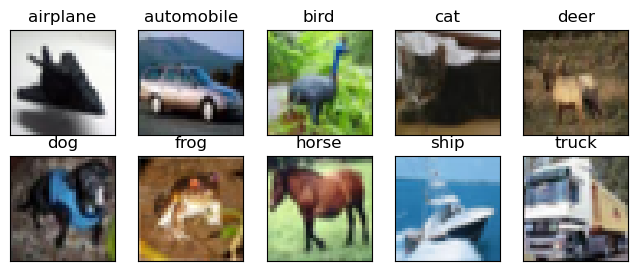

In [15]:
fig = plt.figure(figsize=(8,3))
num_classes = 10
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)
plt.show()

In [12]:
img, label = cifar10[99]

In [13]:
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

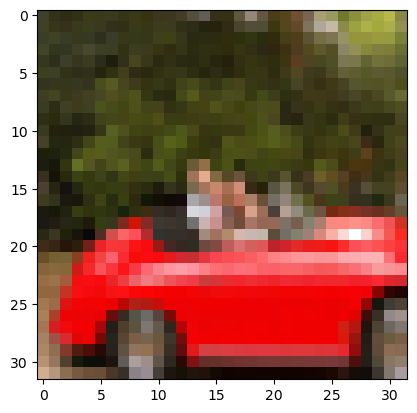

In [14]:
plt.imshow(img)
plt.show()

### Преобразования объектов Dataset

In [16]:
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [17]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [20]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                                  transform=transforms.ToTensor())

In [21]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [22]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [24]:
img_arr = imageio.imread('/Users/alexfil/Desktop/Фото/C5E2D9FA-71CC-4684-BCDD-6801042A04F6_1_105_c.jpeg')

/var/folders/yj/05csyfjn179703hvgy2jqdqm0000gn/T/ipykernel_53737/2838677153.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread('/Users/alexfil/Desktop/Фото/C5E2D9FA-71CC-4684-BCDD-6801042A04F6_1_105_c.jpeg')


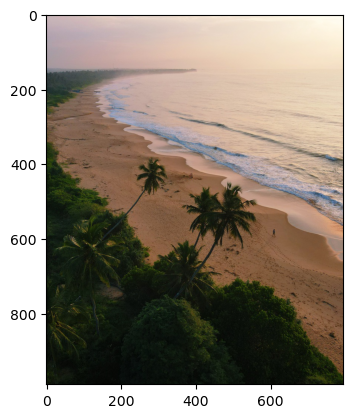

In [25]:
plt.imshow(img_arr)
plt.show()

In [26]:
img_m = to_tensor(img_arr)
img_m.shape

torch.Size([3, 990, 794])

In [27]:
img_m.shape, img_m.dtype

(torch.Size([3, 990, 794]), torch.float32)

In [28]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

In [29]:
img_m.min(), img_m.max()

(tensor(0.), tensor(1.))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


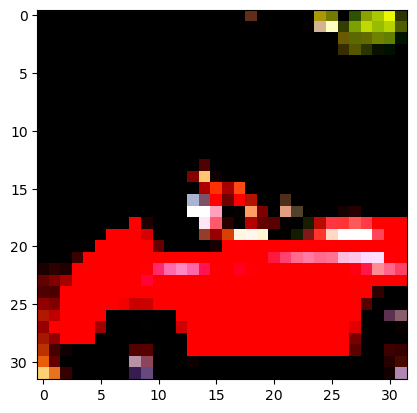

In [81]:
plt.imshow(img_t.permute(1, 2, 0)) 
plt.show()

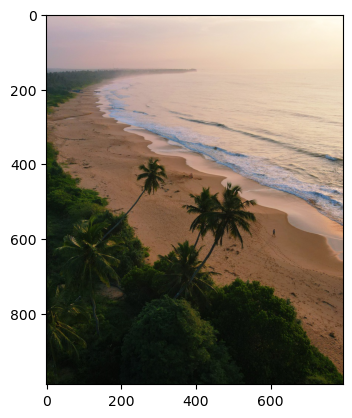

In [31]:
plt.imshow(img_m.permute(1, 2, 0)) 
plt.show()

In [32]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

view(3, –1) сохраняет три канала, схлопывая все остальные измерения в одно и подбирая подходящий размер. Таким образом, наше изображение размером 3 × 32 × 32 преобразуется в тензор 3 × 1024,
после чего вычисляется среднее значение каждого из каналов

In [33]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

In [34]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [35]:
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [36]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
    ]))

In [37]:
img_t, _ = transformed_cifar10[99]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


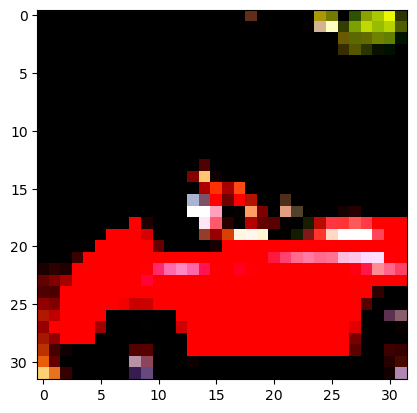

In [38]:
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

### Различие птиц и самолетов

#### Формирование набора данных

In [90]:
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [91]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [92]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

#### Полносвязная модель

In [93]:
n_out = 2
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, n_out)
)

### Представление выходного сигнала в качестве вероятностей

In [94]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [95]:
x = torch.tensor([1.0, 2.0, 3.0])

In [ ]:
softmax(x)

In [ ]:
softmax(x).sum() # сумма всех вероятностей равна 1

In [ ]:
softmax = nn.Softmax(dim=1)

In [ ]:
x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])

In [96]:
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [97]:
model = nn.Sequential(
           nn.Linear(3072, 512),
           nn.Tanh(),
           nn.Linear(512, 2),
           nn.Softmax(dim=1))

In [98]:
img, _ = cifar2[0]

In [99]:
img.shape

torch.Size([3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


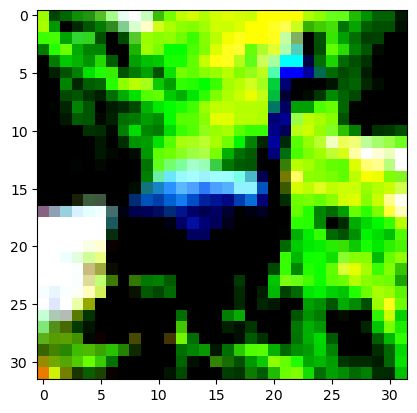

In [100]:
img, _ = cifar2[0]

plt.imshow(img.permute(1, 2, 0))
plt.show()

In [106]:
img_batch = img.view(-1).unsqueeze(0)
img_batch, img_batch.shape

(tensor([[ 0.6139, -0.3228,  ..., -1.3182, -1.0484]]), torch.Size([1, 3072]))

In [107]:
out = model(img_batch)
out

tensor([[0.5221, 0.4779]], grad_fn=<SoftmaxBackward0>)

In [108]:
_, index = torch.max(out, dim=1)
index

tensor([0])

### Функция потерь для классификации

In [109]:
model = nn.Sequential(
             nn.Linear(3072, 512),
             nn.Tanh(),
             nn.Linear(512, 2),
             nn.LogSoftmax(dim=1))

In [110]:
loss = nn.NLLLoss()

In [111]:
img, label = cifar2[0]

In [112]:
label

1

In [114]:
img.view(-1).shape

torch.Size([3072])

In [116]:
out = model(img.view(-1).unsqueeze(0))

In [117]:
out

tensor([[-0.6618, -0.7255]], grad_fn=<LogSoftmaxBackward0>)

In [118]:
loss(out, torch.tensor([label]))

tensor(0.7255, grad_fn=<NllLossBackward0>)

### Обучение классификатора

In [122]:
model = nn.Sequential(
             nn.Linear(3072, 512),
             nn.Tanh(),
             nn.Linear(512, 2),
             nn.LogSoftmax(dim=1))

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 10

for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch: %d, Loss: %f' % (epoch, float(loss)))

Epoch: 0, Loss: 4.391668
Epoch: 1, Loss: 4.675019
Epoch: 2, Loss: 7.559823
Epoch: 3, Loss: 3.276997
Epoch: 4, Loss: 3.549965
Epoch: 5, Loss: 5.333942
Epoch: 6, Loss: 1.871745
Epoch: 7, Loss: 9.690373
Epoch: 8, Loss: 2.458968
Epoch: 9, Loss: 4.227026


In [124]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 10

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch: %d, Loss: %f' % (epoch, float(loss)))

Epoch: 0, Loss: 0.547406
Epoch: 1, Loss: 0.482162
Epoch: 2, Loss: 0.298323
Epoch: 3, Loss: 0.508437
Epoch: 4, Loss: 0.233533
Epoch: 5, Loss: 0.360609
Epoch: 6, Loss: 0.331333
Epoch: 7, Loss: 0.379350
Epoch: 8, Loss: 0.620901
Epoch: 9, Loss: 0.368672


In [125]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

In [126]:
correct = 0
total = 0

In [128]:
with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print('Accuracy: %f', correct / total)

Accuracy: %f 0.797


In [137]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)
model = nn.Sequential(
               nn.Linear(3072, 1024),
             nn.Tanh(),
               nn.Linear(1024, 512),
             nn.Tanh(),
               nn.Linear(512, 128),
             nn.Tanh(),
               nn.Linear(128, 2),
               nn.LogSoftmax(dim=1))

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 10

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch: %d, Loss: %f' % (epoch, float(loss)))

Epoch: 0, Loss: 0.392399
Epoch: 1, Loss: 0.327718
Epoch: 2, Loss: 0.916667
Epoch: 3, Loss: 0.634159
Epoch: 4, Loss: 0.341647
Epoch: 5, Loss: 0.564666
Epoch: 6, Loss: 0.285136
Epoch: 7, Loss: 0.300758
Epoch: 8, Loss: 0.434885
Epoch: 9, Loss: 0.208707


In [138]:
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print('Accuracy train: %f', correct / total)

Accuracy train: %f 0.8128


In [139]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print('Accuracy val: %f', correct / total)

Accuracy val: %f 0.804


In [215]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

In [284]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)
model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

n_epochs = 10

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch: %d, Loss: %f' % (epoch, float(loss)))

Epoch: 0, Loss: 0.784112
Epoch: 1, Loss: 0.783089
Epoch: 2, Loss: 0.472568
Epoch: 3, Loss: 0.291442
Epoch: 4, Loss: 0.472302
Epoch: 5, Loss: 0.241888
Epoch: 6, Loss: 0.563930
Epoch: 7, Loss: 0.678501
Epoch: 8, Loss: 0.672771
Epoch: 9, Loss: 0.375954


In [135]:
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print('Accuracy train: %f', correct / total)

Accuracy train: %f 0.8383


In [136]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print('Accuracy val: %f', correct / total)

Accuracy val: %f 0.8145


In [133]:
numel_list = [p.numel()
              for p in model.parameters()
              if p.requires_grad == True]
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

### Упражнения

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


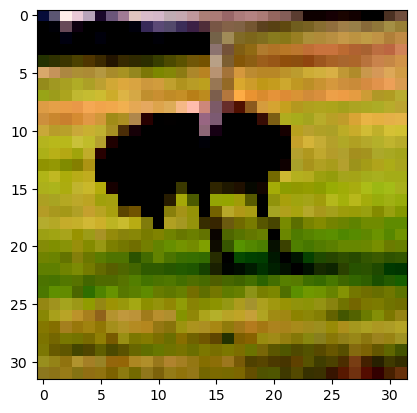

In [297]:
img_c, _ = cifar2[8]

plt.imshow(img_c.permute(1, 2, 0))
plt.show()

In [298]:
img_c.shape

torch.Size([3, 32, 32])

In [299]:
transform = transforms.RandomResizedCrop(size=(20, 20)) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


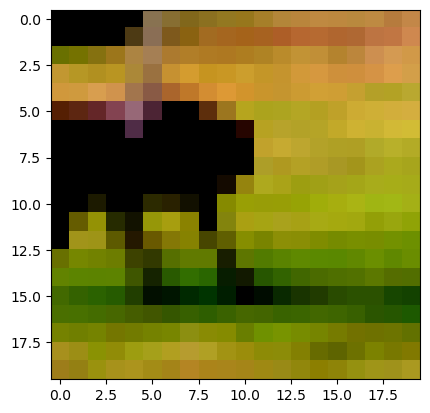

In [300]:
image_crop = transform(img_c) 
  
plt.imshow(image_crop.permute(1, 2, 0))
plt.show()

In [301]:
image_crop.shape

torch.Size([3, 20, 20])

In [302]:
image_crop.view(-1).shape

torch.Size([1200])

In [304]:
image_crop.reshape(-1).shape

torch.Size([1200])

In [281]:
image_crop.view(40, -1).shape

torch.Size([40, 30])

In [282]:
image_crop.reshape(40, -1).shape

torch.Size([40, 30])

In [319]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=40,
                                           shuffle=True)
model = nn.Sequential(
            nn.Linear(1200, 600),
            nn.Tanh(),
            nn.Linear(600, 300),
            nn.Tanh(),
            nn.Linear(300, 150),
            nn.Tanh(),
            nn.Linear(150, 2))

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

transform = transforms.RandomResizedCrop(size=(20, 20)) 

n_epochs = 10

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        image_crop = transform(imgs)
        batch_size = image_crop.shape[0]
        outputs = model(image_crop.reshape(batch_size, -1))
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch: %d, Loss: %f' % (epoch, float(loss)))

Epoch: 0, Loss: 0.579001
Epoch: 1, Loss: 0.560274
Epoch: 2, Loss: 0.544295
Epoch: 3, Loss: 0.634144
Epoch: 4, Loss: 0.427825
Epoch: 5, Loss: 0.567177
Epoch: 6, Loss: 0.500278
Epoch: 7, Loss: 0.521489
Epoch: 8, Loss: 0.487831
Epoch: 9, Loss: 0.414541


In [294]:
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        image_crop = transform(imgs)
        batch_size = image_crop.shape[0]
        outputs = model(image_crop.reshape(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print('Accuracy train: %f', correct / total)

Accuracy train: %f 0.7698


In [295]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=40,
                                         shuffle=False)
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        image_crop = transform(imgs)
        batch_size = image_crop.shape[0]
        outputs = model(image_crop.reshape(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print('Accuracy val: %f', correct / total)

Accuracy val: %f 0.7775


### Сверточные сети

In [320]:
conv = nn.Conv2d(3, 16, kernel_size=3)

In [321]:
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [322]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [323]:
img, _ = cifar2[0]

In [324]:
output = conv(img.unsqueeze(0))

In [325]:
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

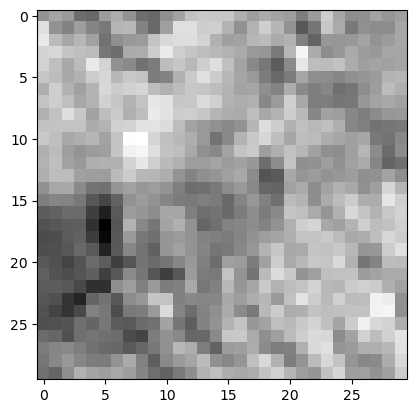

In [326]:
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [327]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

In [328]:
output = conv(img.unsqueeze(0))

In [329]:
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

### Обнаружение признаков с помощью сверток

In [330]:
with torch.no_grad():
    conv.bias.zero_()
with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

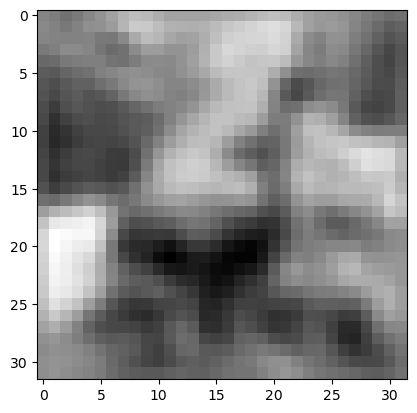

In [331]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [332]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

In [334]:
with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]]
                                 )
    conv.bias.zero_() 

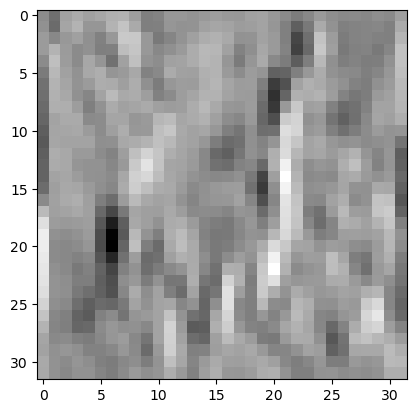

In [335]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

### Понижающая дискретизация

In [336]:
pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))

In [337]:
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

### Создание подклассов NN.moDule

In [339]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act4 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8)
        out = self.act4(self.fc1(out))
        out = self.fc2(out)
        return out

In [340]:
model = Net()

In [341]:
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

### Функциональные API

In [343]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [344]:
model = Net()
model(img.unsqueeze(0))

tensor([[0.0908, 0.0938]], grad_fn=<AddmmBackward0>)

### Обучение сверточной сети

In [350]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out
    
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(datetime.datetime.now(),
                                                         epoch, loss_train / len(train_loader))
                 )

In [366]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)
model = Net()
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
n_epochs = 300

In [367]:
training_loop(n_epochs=n_epochs,
              optimizer=optimizer,
              model=model,
              loss_fn=loss_fn,
              train_loader = train_loader,
)

2024-07-18 15:35:43.524622 Epoch 1, Training loss 0.5749560799568322
2024-07-18 15:36:01.393170 Epoch 10, Training loss 0.3324737000237605
2024-07-18 15:36:19.899100 Epoch 20, Training loss 0.2942813707005446
2024-07-18 15:36:37.935344 Epoch 30, Training loss 0.2650329664254644
2024-07-18 15:36:55.867863 Epoch 40, Training loss 0.239808859718833
2024-07-18 15:37:13.810571 Epoch 50, Training loss 0.21227627176388053
2024-07-18 15:37:31.596651 Epoch 60, Training loss 0.18834563624706996
2024-07-18 15:37:49.373277 Epoch 70, Training loss 0.16640041569235978
2024-07-18 15:38:07.359701 Epoch 80, Training loss 0.14222854373466437
2024-07-18 15:38:24.943670 Epoch 90, Training loss 0.12232926001499413
2024-07-18 15:38:42.775913 Epoch 100, Training loss 0.0976336850149996
2024-07-18 15:39:00.444182 Epoch 110, Training loss 0.07541847905250872
2024-07-18 15:39:18.251445 Epoch 120, Training loss 0.05708068873804466
2024-07-18 15:39:35.778453 Epoch 130, Training loss 0.040925243347408664
2024-07-1

### Измерение степени безошибочности

In [368]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

In [369]:
def validate(model, train_loader, val_loader):
    for name, loader in [('train', train_loader), ('val', val_loader)]:
        correct = 0
        total = 0
        with torch.no_grad():
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
        
        print('Accuracy: %f' % (correct / total))         

In [370]:
validate(model, train_loader, val_loader)

Accuracy: 0.999900
Accuracy: 0.888500


### Сохранение и загрузка модели

In [371]:
torch.save(model.state_dict(), data_path + 'birds_vs_airplanes.pt')

In [372]:
loaded_model = Net()
loaded_model.load_state_dict(torch.load(data_path + 'birds_vs_airplanes.pt'))

<All keys matched successfully>

### Обучение на GPU

In [373]:
device = (torch.device('cuda') if torch.cuda.is_available()
          else torch.device('cpu'))
print(f'Training on device {device}.')

Training on device cpu.


In [418]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(datetime.datetime.now(),
                                                         epoch, loss_train / len(train_loader))
                 )
def validate(model, train_loader, val_loader):
    for name, loader in [('train', train_loader), ('val', val_loader)]:
        correct = 0
        total = 0
        with torch.no_grad():
            for imgs, labels in loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
        
        print('Accuracy: %f' % (correct / total))

In [376]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

In [377]:
model = Net().to(device=device)
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
n_epochs = 100

In [378]:
training_loop(n_epochs, optimizer, model, loss_fn, train_loader)

2024-07-18 16:07:12.821151 Epoch 1, Training loss 0.6399875378153127
2024-07-18 16:08:54.717454 Epoch 50, Training loss 0.20703423986579203
2024-07-18 16:10:51.486789 Epoch 100, Training loss 0.07375005723991591


In [379]:
validate(model, train_loader, val_loader)

Accuracy: 0.963000
Accuracy: 0.881500


In [380]:
loaded_model = Net().to(device=device)
loaded_model.load_state_dict(torch.load(data_path
                                        + 'birds_vs_airplanes.pt',
                                        map_location=device)
                            )

<All keys matched successfully>

### Расширение объема памяти: ширина

In [381]:
class NetWidth(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [382]:
sum(p.numel() for p in model.parameters())

18090

### Регуляризация

In [383]:
def training_loop_l2reg(n_epochs, optimizer, model, loss_fn,
                        train_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            l2_lambda = 0.001
            l2_norm = sum(p.pow(2.0).sum()
                          for p in model.parameters())
            loss = loss + l2_lambda * l2_norm
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch,
                loss_train / len(train_loader)))

In [384]:
training_loop_l2reg(n_epochs, optimizer, model, loss_fn,
                        train_loader)

2024-07-18 16:50:02.952711 Epoch 1, Training loss 0.1333599309347997
2024-07-18 16:50:26.603451 Epoch 10, Training loss 0.12250505031863596
2024-07-18 16:50:45.092808 Epoch 20, Training loss 0.1133511240600021
2024-07-18 16:51:04.548057 Epoch 30, Training loss 0.10653173681467203
2024-07-18 16:51:25.468055 Epoch 40, Training loss 0.10133987949911956
2024-07-18 16:51:45.639601 Epoch 50, Training loss 0.09729906010210135
2024-07-18 16:52:09.069533 Epoch 60, Training loss 0.09411866611735836
2024-07-18 16:52:35.736575 Epoch 70, Training loss 0.0915583204122106
2024-07-18 16:52:55.245829 Epoch 80, Training loss 0.08944768463350405
2024-07-18 16:53:14.988145 Epoch 90, Training loss 0.08764328783864428
2024-07-18 16:53:36.936851 Epoch 100, Training loss 0.08605749387839798


### Дропаут

Идея дропаута действительно проста: обнуляем случайную часть выходных сигналов нейронов по сети, причем этот случайный выбор производится на каждой итерации обучения.

В качестве аргумента необходимо указать вероят- ность, с которой будут обнуляться входные сигналы 

In [385]:
class NetDropout(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_dropout = nn.Dropout2d(p=0.4)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.conv2_dropout = nn.Dropout2d(p=0.4)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = self.conv1_dropout(out)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = self.conv2_dropout(out)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [386]:
model.train()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=512, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
)

In [387]:
model.eval()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=512, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
)

### Нормализация по батчам

Нормализация по батчам в PyTorch производится с помощью модулей nn.BatchNorm1D, nn.BatchNorm2d и nn.BatchNorm3d, в зависимости от размер- ности входных данных А поскольку цель нормализации по батчам — масшта- бировать входные сигналы функций активации, логично будет производить ее после линейного преобразования (свертки в данном случае) и активации, как показано здесь:

In [389]:
class NetBatchNorm(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv1_batchnorm = nn.BatchNorm2d(num_features=n_chans1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.conv2_batchnorm = nn.BatchNorm2d(num_features=n_chans1 // 2)
        self.fc1 = nn.Linear(8 * 8 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
    def forward(self, x):
        out = self.conv1_batchnorm(self.conv1(x))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = self.conv2_batchnorm(self.conv2(out))
        out = F.max_pool2d(torch.tanh(out), 2)
        out = out.view(-1, 8 * 8 * self.n_chans1 // 2)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

### Обходные связи

In [390]:
class NetDepth(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2,
                               kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out = F.max_pool2d(torch.relu(self.conv3(out)), 2)
        out = out.view(-1, 4 * 4 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

Добавление в эту модель обходной связи наподобие ResNet сводится к прибав- лению выходного сигнала первого слоя в функции forward к входному сигналу третьего слоя:

In [391]:
class NetRes(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2,
                               kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 2)
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out1 = out
        out = F.max_pool2d(torch.relu(self.conv3(out)) + out1, 2)
        out = out.view(-1, 4 * 4 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

### Создание очень глубоких моделей в PyTorch

In [406]:
class ResBlock(nn.Module):
    def __init__(self, n_chans):
        super(ResBlock, self).__init__()
        self.conv = nn.Conv2d(n_chans, n_chans, kernel_size=3,
                              padding=1, bias=False)
        self.batch_norm = nn.BatchNorm2d(num_features=n_chans)
        torch.nn.init.kaiming_normal_(self.conv.weight,
                                      nonlinearity='relu')
        torch.nn.init.constant_(self.batch_norm.weight, 0.5)
        torch.nn.init.zeros_(self.batch_norm.bias)
    def forward(self, x):
        out = self.conv(x)
        out = self.batch_norm(out)
        out = torch.relu(out)
        return out + x

In [411]:
class NetResDeep(nn.Module):
    def __init__(self, n_chans1=32, n_blocks=10):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.resblocks = nn.Sequential(*(n_blocks * [ResBlock(n_chans=n_chans1)]))
        self.fc1 = nn.Linear(8 * 8 * n_chans1, 32)
        self.fc2 = nn.Linear(32, 2)
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = self.resblocks(out)
        out = F.max_pool2d(out, 2)
        out = out.view(-1, 8 * 8 * self.n_chans1)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [412]:
device = (torch.device('cuda') if torch.cuda.is_available()
          else torch.device('cpu'))
print(f'Training on device {device}.')

Training on device cpu.


In [413]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

In [416]:
model = NetResDeep().to(device=device)
learning_rate = 0.1
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
n_epochs = 10

In [419]:
training_loop(n_epochs, optimizer, model, loss_fn, train_loader)

2024-07-18 17:47:47.752021 Epoch 1, Training loss 0.6933688882050241
2024-07-18 17:51:01.964291 Epoch 10, Training loss 0.6933688286003793
